In [12]:
# Source - https://stackoverflow.com/a
# Posted by FYH
# Retrieved 2026-01-22, License - CC BY-SA 4.0

import numpy as np
def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)


In [13]:
%pip install autogluon.tabular

from autogluon.tabular import TabularPredictor
import gc


Note: you may need to restart the kernel to use updated packages.


In [14]:

# Train a predictor for "registered"
predictor_registered = TabularPredictor(label="registered", path="ag_registered/").fit("train.csv", presets="best",time_limit=600)
predictions_registered = predictor_registered.predict("test.csv")

# Explicitly delete and collect garbage to release file handles
del predictor_registered
gc.collect()

Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.13.5
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          16
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       17.09 GB / 31.93 GB (53.5%)
Disk Space Avail:   112.83 GB / 930.30 GB (12.1%)
Presets specified: ['best']
Loaded data from: train.csv | Columns = 17 / 17 | Rows = 13903 -> 13903
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable o

3990

In [15]:
# Train a predictor for "casual"
predictor_casual = TabularPredictor(label="casual", path="ag_casual/").fit("train.csv", presets="best",time_limit=600)
predictions_casual = predictor_casual.predict("test.csv")

Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.13.5
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          16
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       17.26 GB / 31.93 GB (54.1%)
Disk Space Avail:   112.82 GB / 930.30 GB (12.1%)
Presets specified: ['best']
Loaded data from: train.csv | Columns = 17 / 17 | Rows = 13903 -> 13903
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable o

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

# Charger les vraies valeurs du fichier test
test_df = pd.read_csv("test.csv")

y_true_registered = test_df["registered"].values
y_true_casual = test_df["casual"].values

if 'registered' in test_df.columns and 'casual' in test_df.columns:
    # R2 et MAE pour registered
    r2_registered = r2_score(y_true_registered, predictions_registered)
    mae_registered = mean_absolute_error(y_true_registered, predictions_registered)
    rmse_registered = np.sqrt(mean_squared_error(y_true_registered, predictions_registered))

    print(f"R2 registered: {r2_registered:.3f}")
    print(f"MAE registered: {mae_registered:.2f}")
    print(f"RMSE registered: {rmse_registered:.2f}")

    # R2 et MAE pour casual
    rmse_casual = np.sqrt(mean_squared_error(y_true_casual, predictions_casual))
    r2_casual = r2_score(y_true_casual, predictions_casual)
    mae_casual = mean_absolute_error(y_true_casual, predictions_casual)
    print(f"R2 casual: {r2_casual:.3f}")
    print(f"MAE casual: {mae_casual:.2f}")
    print(f"RMSE casual: {rmse_casual:.2f}")

    # R2 et MAE pour cnt (registered + casual)
    cnt_true = y_true_registered + y_true_casual
    cnt_pred = predictions_registered + predictions_casual
    r2_cnt = r2_score(cnt_true, cnt_pred)
    mae_cnt = mean_absolute_error(cnt_true, cnt_pred)
    print(f"R2 cnt: {r2_cnt:.3f}")
    print(f"MAE cnt: {mae_cnt:.2f}")
else:
    print("Les colonnes 'registered' et 'casual' ne sont pas présentes dans test.csv.")

"""R2 registered: 0.999
MAE registered: 1.89
RMSE registered: 6.52
R2 casual: 0.980
MAE casual: 3.03
RMSE casual: 7.87
R2 cnt: 0.998
MAE cnt: 3.79"""

R2 registered: 0.998
MAE registered: 2.66
RMSE registered: 8.32
R2 casual: 0.963
MAE casual: 4.36
RMSE casual: 10.72
R2 cnt: 0.996
MAE cnt: 5.28


'R2 registered: 0.999\nMAE registered: 1.89\nRMSE registered: 6.52\nR2 casual: 0.980\nMAE casual: 3.03\nRMSE casual: 7.87\nR2 cnt: 0.998\nMAE cnt: 3.79'

AttributeError: 'numpy.ndarray' object has no attribute 'values'

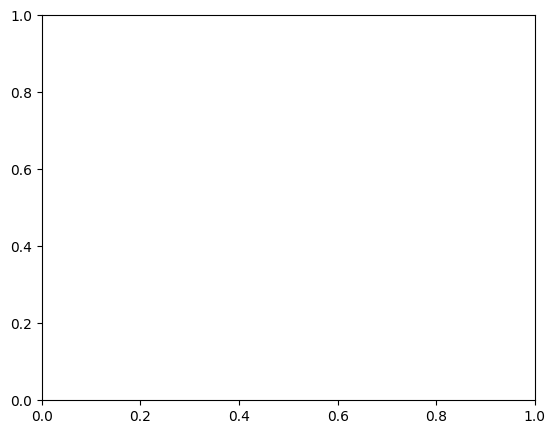

In [ ]:
import matplotlib.pyplot as plt

# Sélectionner les 7 premiers jours (ou 7 premières lignes)
n_days = 30
idx = slice(0, n_days)

plt.figure(figsize=(14, 5))

# Registered
plt.subplot(1, 2, 1)
plt.plot(y_true_registered[idx], label="Vrai registered", marker='o', color='blue')
plt.plot(predictions_registered.values[idx], label="Prédit registered", marker='x', color='orange')
plt.title("Registered sur une semaine")
plt.xlabel("Jour")
plt.ylabel("Valeur")
plt.legend()

# Casual
plt.subplot(1, 2, 2)
plt.plot(y_true_casual[idx], label="Vrai casual", marker='o', color='green')
plt.plot(predictions_casual.values[idx], label="Prédit casual", marker='x', color='red')
plt.title("Casual sur une semaine")
plt.xlabel("Jour")
plt.ylabel("Valeur")
plt.legend()

plt.tight_layout()
plt.show()


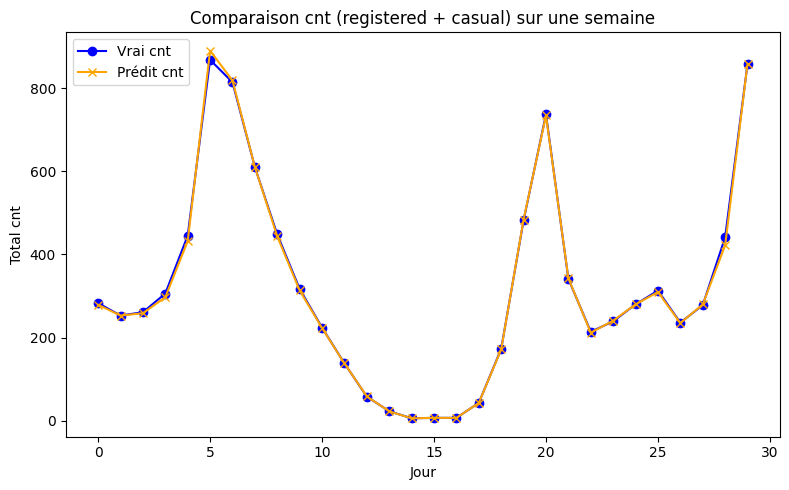

In [ ]:
# Nombre de jours à afficher
n_days = 30
idx = slice(0, n_days)

# Calcul des séries cnt (total)
cnt_true = y_true_registered.values[idx] + y_true_casual.values[idx]
cnt_pred = predictions_registered.values[idx] + predictions_casual.values[idx]

plt.figure(figsize=(8, 5))
plt.plot(cnt_true, label="Vrai cnt", marker='o', color='blue')
plt.plot(cnt_pred, label="Prédit cnt", marker='x', color='orange')
plt.title("Comparaison cnt (registered + casual) sur une semaine")
plt.xlabel("Jour")
plt.ylabel("Total cnt")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:


# Charger les données
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Paramètre : intervalle de réentrainement
k = 5  # Réentraîner tous les 5 nouveaux points
n = len(test_df)

# Listes pour stocker les prédictions
preds_registered = []
preds_casual = []

for i in range(n):
    # Réentraîner tous les k points ou à la première itération
    if i % k == 0 or i == 0:
        predictor_registered = TabularPredictor(label="registered", path="ag_registered/").fit(train_df, presets="best")
        predictor_casual = TabularPredictor(label="casual", path="ag_casual/").fit(train_df, presets="best")
    
    # Prédire la nouvelle donnée
    X_new = test_df.iloc[[i]].copy()
    pred_reg = predictor_registered.predict(X_new).values[0]
    pred_cas = predictor_casual.predict(X_new).values[0]
    preds_registered.append(pred_reg)
    preds_casual.append(pred_cas)
    
    # Ajouter la vraie nouvelle donnée au train pour la prochaine itération
    train_df = pd.concat([train_df, test_df.iloc[[i]]], ignore_index=True)
    
    # Libérer la mémoire
    del predictor_registered, predictor_casual
    gc.collect()

# Résultats sous forme de séries pandas
preds_registered = pd.Series(preds_registered, name="registered_pred")
preds_casual = pd.Series(preds_casual, name="casual_pred")


n_points = 30  # Nombre de points à afficher (adapte selon la taille de test_df)
idx = slice(0, n_points)

plt.figure(figsize=(15, 8))

# Registered
plt.subplot(3, 1, 1)
plt.plot(test_df['registered'].values[idx], label="Vrai registered", marker='o', color='blue')
plt.plot(preds_registered.values[idx], label="Prédit registered (séquentiel)", marker='x', color='orange')
plt.title("Évolution des prédictions registered (séquentiel)")
plt.ylabel("Registered")
plt.legend()

# Casual
plt.subplot(3, 1, 2)
plt.plot(test_df['casual'].values[idx], label="Vrai casual", marker='o', color='green')
plt.plot(preds_casual.values[idx], label="Prédit casual (séquentiel)", marker='x', color='red')
plt.title("Évolution des prédictions casual (séquentiel)")
plt.ylabel("Casual")
plt.legend()

# Total cnt
plt.subplot(3, 1, 3)
cnt_true = test_df['registered'].values[idx] + test_df['casual'].values[idx]
cnt_pred = preds_registered.values[idx] + preds_casual.values[idx]
plt.plot(cnt_true, label="Vrai cnt", marker='o', color='purple')
plt.plot(cnt_pred, label="Prédit cnt (séquentiel)", marker='x', color='brown')
plt.title("Évolution des prédictions cnt (séquentiel)")
plt.xlabel("Index")
plt.ylabel("Total cnt")
plt.legend()

plt.tight_layout()
plt.show()